In [ ]:
!pip install gwpy --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
%%capture
!pip install yfinance

#custos de operação 
aluguel:0.03
corretagem = 0.0012


1 - Fazendo as importações

In [ ]:

import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from statistics import pstdev
import statistics
import datetime
from collections import deque
import datetime

2 - Definindo as funções

In [ ]:
def retornos(ativo, data_inicio, data_fim):
  """
  Pega o retorno do ativo na data especificada. Além disso, cria uma coluna com o dia da semana dessa data e
  outras duas referentes à volatilidade EWMA
  """
  search_result = inv.search_quotes(text=ativo, products=['commodities'], n_results=1)
  historical_data = search_result.retrieve_historical_data(from_date=data_inicio, to_date=data_fim)
  df_historic = historical_data
  df_historic.iloc[0] = 0
  return df_historic


def stock(ativo, data_inicio, data_fim):
  """
  Pega o retorno do ativo na data especificada. Além disso, cria uma coluna com o dia da semana dessa data e
  outras duas referentes à volatilidade EWMA
  """
  df_historic = yf.download(ativo, start=data_inicio, end=data_fim)
  df_historic.iloc[0] = 0
  return df_historic


def get_moving_average(df, days):
    # str(days) transforma em string o objeto "days" dado para a função, assim vou ter no nome da coluna o número de dias daquela média móvel. ex: SMA9, SMA40
    # df.iloc[:, 1]  seleciona todas as observações da coluna 1 (deve ser a coluna de preços de fechamento, lembre-se disso ao colocar o objeto df na função)
    # rolling(window=days).mean() faz a mágica acontecer, ele faz a média móvel de toda a série temporal.
    
    lista = df.iloc[:,0].rolling(window=days).mean()

    return lista

def get_moving_averageSinal(df, days):
    # str(days) transforma em string o objeto "days" dado para a função, assim vou ter no nome da coluna o número de dias daquela média móvel. ex: SMA9, SMA40
    # df.iloc[:, 1]  seleciona todas as observações da coluna 1 (deve ser a coluna de preços de fechamento, lembre-se disso ao colocar o objeto df na função)
    # rolling(window=days).mean() faz a mágica acontecer, ele faz a média móvel de toda a série temporal.
    
    lista = df.iloc[:,8].rolling(window=days).mean()

    return lista

def get_moving_stdev(df, days):
    # str(days) transforma em string o objeto "days" dado para a função, assim vou ter no nome da coluna o número de dias daquela média móvel. ex: SMA9, SMA40
    # df.iloc[:, 1]  seleciona todas as observações da coluna 1 (deve ser a coluna de preços de fechamento, lembre-se disso ao colocar o objeto df na função)
    # rolling(window=days).mean() faz a mágica acontecer, ele faz a média móvel de toda a série temporal.
    
    lista2 = df.iloc[:,2].rolling(days).std()

    return lista2

def cdi(start_date, end_date):
  """
  Acopla um vetor chamado "CDI" que contém os retornos do CDI em um dataframe
  """
  url_cdi='http://api.bcb.gov.br/dados/serie/bcdata.sgs.12/dados?formato=json'
  df_cdi = pd.read_json(url_cdi)
  df_cdi['data'] = pd.to_datetime(df_cdi['data'], dayfirst=True)
  df_cdi.set_index('data', inplace=True)
  df_cdi = df_cdi[(end_date >= df_cdi.index)]
  df_cdi = df_cdi[(start_date <= df_cdi.index)]
  return df_cdi

3 - Definição do período e dos ativos


In [ ]:
#Ações do setor de commodities

ativos = ['JBSS3.SA','BEEF3.SA','BRFS3.SA','AGRO3.SA','VALE3.SA','PETR4.SA','KLBN11.SA','SLCE3.SA']
#ativos = ['JBSS3','VALE3','PETR4','KLBN11','SLCE3']




treino_array = [
                ['2013-06-04', '2015-06-05'],
                ['2014-06-04', '2016-06-04'],
                ['2015-06-04', '2017-06-04'],
                ['2016-06-04', '2018-06-04'],
                ['2017-06-05', '2019-06-04'],
                ['2018-06-05', '2020-06-04'],
                ['2019-06-05', '2021-06-04']
                ]

teste_array = [
                ['2015-06-05', '2016-06-06'],
                ['2016-06-06', '2017-06-05'],
                ['2017-06-05', '2018-06-04'],
                ['2018-06-05', '2019-06-04'],
                ['2019-06-05', '2020-06-04'],
                ['2020-06-05', '2021-06-04'],
                ['2021-06-05', '2022-11-30']
                ]

4 - Construindo os DataFrames a ser usados

In [ ]:
#Dataframe de CDI
CDI = cdi('06/04/2010', "11/30/2022")/100

#DataFrame de otimização


MACD =  [0.1,0.2,0.3] #[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.10,1.20]

l=[]

for m in MACD:
  l.append(f'{m}')

sharpe = pd.DataFrame()
sharpe.index = l
for i in treino_array:
  sharpe[f'{i[1][:4]}']=''
sharpe

#DF de resultado
resultado = pd.DataFrame()
resultado.index = CDI.index


#l[20].split(',')[0]  #---> usar isso para separar 


In [ ]:
sharpe


,2015,2016,2017,2018,2019,2020,2021
0.1,,,,,,,
0.2,,,,,,,
0.3,,,,,,,


In [ ]:
for i in treino_array:
  print(i[1][-2:])

05
04
04
04
04
04
04


In [ ]:
%%capture
# brincando com o Aroon Oscilator 

#criando o df de retornos

df = stock('JBSS3.SA','2021-06-05', '2022-09-30')
df['return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['return'].iloc[0] = 0
df['return'].iloc[1] = 0

#começando a função de Aroon Oscilator
#transformando tudo em lista
date = df.index.to_list()
highp = df['High'].to_list()
lowp = df['Low'].to_list()
tf=25  #setup do oscilador --> dias passados desde a máx ou mín de 25 dias.

aroonup = []
aroondown=[]
aroondate=[]
x=tf

while x<len(date): #indo do 25 até o máximo da lista.
  aroon_up = ((highp[x-tf:x].index(max(highp[x-tf:x])))/float(tf))*100 #pega o índice do valor máximo (para depois achar o respectivo dia.)
  aroon_down = ((lowp[x-tf:x].index(min(lowp[x-tf:x])))/float(tf))*100
  aroonup.append(aroon_up)
  aroondown.append(aroon_down)
  aroondate.append(date[x])
  x+=1

df_teste = pd.DataFrame()
aroondown = pd.Series(aroondown)
aroonup = pd.Series(aroonup)
aroondate = pd.Series(aroondate)

df_teste['AroonDown'] = aroondown
df_teste['AroonUp'] = aroonup
df_teste['Date'] = aroondate
df_teste.set_index('Date',inplace=True)

#criando de fato o oscilador
df['Aroon_Oscilator'] = df_teste['AroonUp']-df_teste['AroonDown']


In [ ]:
%%capture
pip install matplotlib==3.1.3

<Figure size 2200x800 with 0 Axes>

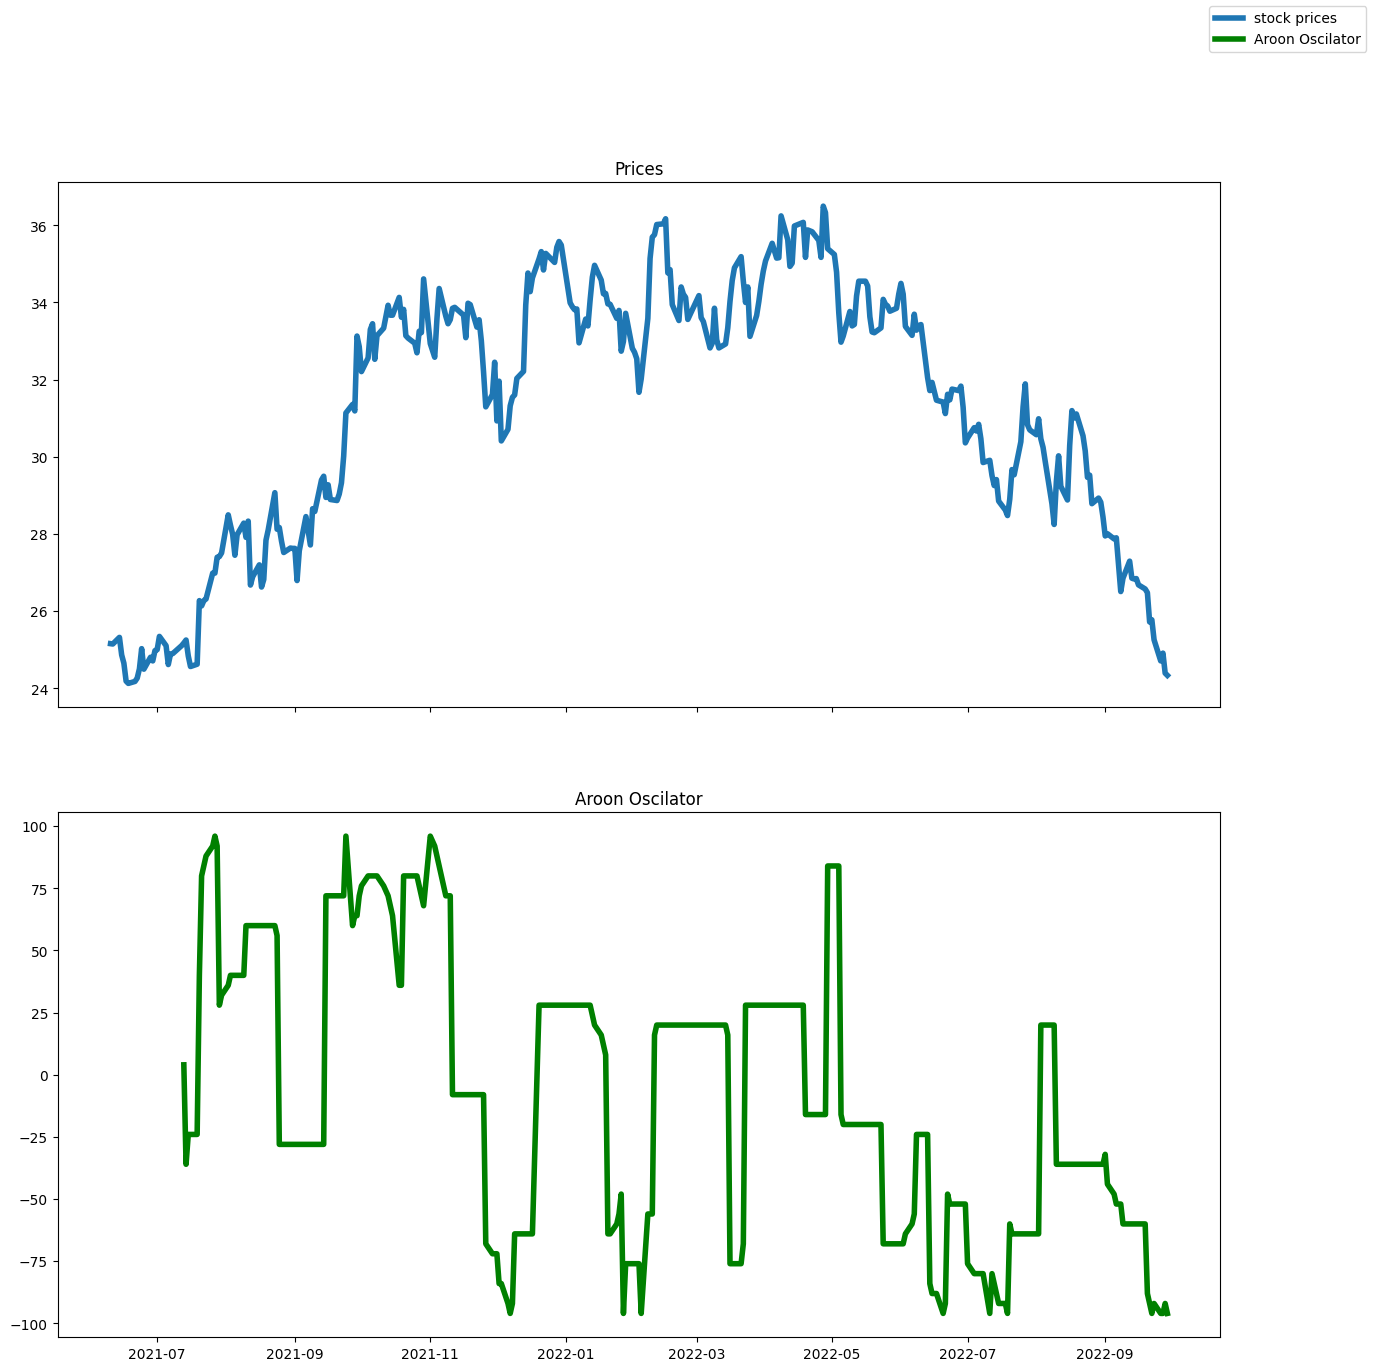

In [ ]:
import matplotlib.pyplot as plt
#plotando para ver
plt.figure(figsize=(22,8))
fig, ax = plt.subplots(2,1,sharex=True,figsize=(15,15))
ax[0].plot(df['Adj Close'][3:],linewidth=4,label='stock prices')
ax[0].set_title('Prices')
ax[1].plot(df['Aroon_Oscilator'],color = "green",linewidth = 4,label='Aroon Oscilator')
ax[1].set_title('Aroon Oscilator')
fig.legend()




# Escrevendo a estratégia

In [ ]:
signal = 0
buy,sell = [],[]
df_log = pd.DataFrame()
for i in range(len(df)):
  if df['Aroon_Oscilator'].iloc[i-1]<0 and df['Aroon_Oscilator'].iloc[i]>0 and signal==0:
    signal+=1
    buy.append(i)
    a_row = pd.Series(['buy',df.index[i+1],df['Open'].iloc[i+1]])
    row_df=pd.DataFrame([a_row])
    df_log = pd.concat([row_df,df_log],ignore_index=True)
  elif df['Aroon_Oscilator'].iloc[i-1]>0 and df['Aroon_Oscilator'].iloc[i] <0 and signal ==1:
    signal =0
    sell.append(i)
    a_row=  pd.Series(['sell', df.index[i+1],df['Open'].iloc[i+1]])
    row_df=pd.DataFrame([a_row])
    df_log = pd.concat([row_df,df_log],ignore_index=True)

df_log= df_log.rename(columns={0:"type",1:"Date",2:"Open Price"})
df_log.set_index("Date",inplace = True)

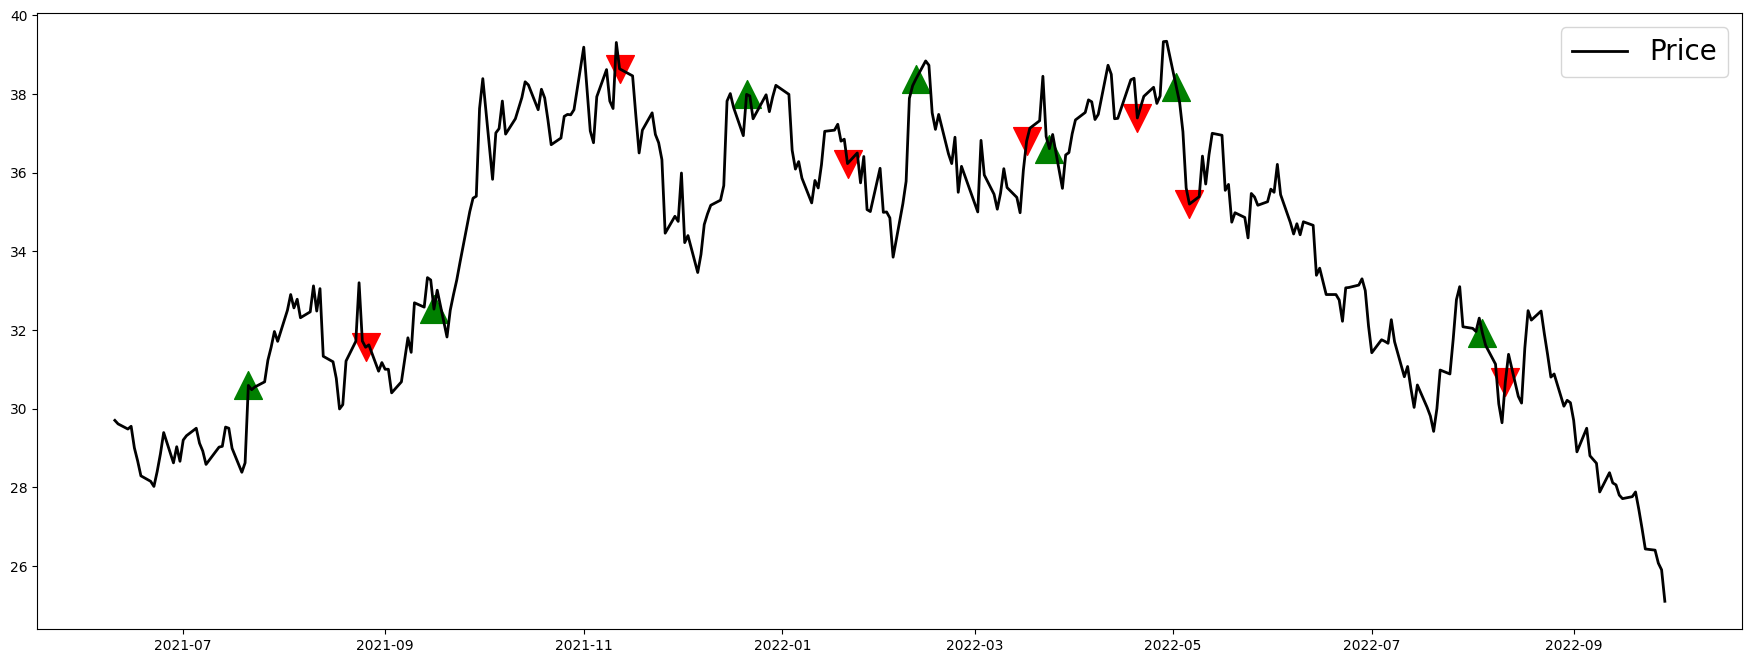

In [ ]:
plt.figure(figsize=(22,8))
plt.scatter(df_log.loc[df_log['type']=='buy'].index,df_log.loc[df_log['type']=='buy']['Open Price'],marker="^",color="green",s=400)
plt.scatter(df_log.loc[df_log['type']=='sell'].index,df_log.loc[df_log['type']=='sell']['Open Price'],marker="v",color="red",s=400)
plt.plot(df["Open"][3:], label="Price", color="k",linewidth =2)
plt.legend(fontsize=20)
plt.show()

In [ ]:
df_log

,type,Open Price
Date,,
2022-08-11,sell,30.670000
2022-08-04,buy,31.910000
2022-05-06,sell,35.200001
2022-05-02,buy,38.180000
2022-04-20,sell,37.389999
2022-03-24,buy,36.610001
2022-03-17,sell,36.799999
2022-02-11,buy,38.380001
2022-01-21,sell,36.230000


### 5 - Script de otimização
*Usando a matriz treino*



In [ ]:
%%capture
#ICC
alvo=100 #100,125,150,175,200,225,250
fatorICC=0.015   #0.010,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.020

#MACD
média_movel = 14 #range(10,30)
MACD_curta = 12 #range(10,25)
MACD_longa = 26 #range(25,50)
MACD_sinal = 9 #range(5,20)
MACD_sensibilidade = [0.1,0.2,0.3] #[0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.7,0.8,0.9,1.1,1.2]

resultado = pd.DataFrame()
resultado.index = CDI.index


"""
preciso de:
period
sensibility
"""
#period = ['2019-06-05', '2021-06-04']
sensibility = 0.1



for period in treino_array:
  for ativo in ativos:
          #date_teste = datetime.datetime.strptime(period[0], "%d/%m/%Y")
          #initial_teste = date_teste - datetime.timedelta(days= 40)               #ajeitando a data
          #initial = datetime.datetime.strftime(initial_teste, "%d/%m/%Y")
          df_base = stock(ativo,period[0],period[1]) 

          df_index = pd.Series(df_base.index)
          index = []
          for indice in range(len(df_index)):
            index.append(df_index[indice].strftime('%Y-%m-%d'))

          df_base.index = pd.DatetimeIndex(index)

          df_base['return'] = np.log(df_base['Adj Close']/df_base['Adj Close'].shift(1))
          df_base['return'].iloc[0] = 0
          df_base['return'].iloc[1] = 0

          ICC = pd.DataFrame()

          
          # Criando as colunas

          ICC['data'] = df_base.index
          ICC.set_index('data', inplace = True)
          ICC['ret'] = df_base['Adj Close']
          ICC['PT'] = ''
          ICC['MM'] = ''
          ICC['dm'] = ''
          ICC['DM'] = ''    #desvui padrão dos MM

          ICC['ICC'] = ''

          ICC['situação'] = '' 



          # Preenchendo as colunas

          ICC['PT'] = ( df_base['High'] + df_base['Low']+ df_base['Adj Close'] )/3   # PT é a média simples da máxima, mínima e fechamento

          ICC['MM'] = get_moving_average(ICC,média_movel)

          ICC['dm'] = ICC['PT'] - ICC['MM']

          ICC['DM'] = get_moving_stdev(ICC,média_movel)


          ICC['ICC'] = ( ICC['dm']  )/ (ICC['DM']*fatorICC)

          #acrescentando a posição

          for k in ICC.index:
            if ICC['ICC'][k] > alvo:
              ICC['situação'][k] = 'sobrecomprado'
            elif ICC['ICC'][k] < -alvo:
              ICC['situação'][k] = 'sobrevendido'
            else:
              ICC['situação'][k] = 'dentro do range'


          ########################## cálculos Bandas de Bollinger ######################
          ICC['SMA20'] = ICC['ret'].rolling(20).mean()
          ICC['STD'] = ICC['ret'].rolling(20).std()
          ICC["BB_Upper"]=ICC["SMA20"]+(2*ICC["STD"]) 
          ICC["BB_Lower"]=ICC["SMA20"]-(2*ICC["STD"])

          ICC['BBOL signal'] = ''

          for i in range(2,len(ICC)):
            if ICC['ret'][i-2]<ICC['BB_Lower'][i-2] and ICC['ret'][i-1] > ICC['BB_Lower'][i-1]:
              ICC['BBOL signal'][i] = 1
            elif ICC['ret'][i-2] >ICC['BB_Upper'][i-2] and ICC['ret'][i-1] < ICC['BB_Upper'][i-1]:
              ICC['BBOL signal'][i] = 0
            else:
              ICC['BBOL signal'][i] = np.nan

          
          ICC['BBOL signal'].fillna(method='ffill', inplace=True)
          ICC['BBOL signal'] = ICC['BBOL signal'].replace([''], [np.nan])


          ########################## cálculos do MACD ##################################
          ICC['média curta'] =''
          ICC['média longa']= ''
          ICC['curva MACD'] = ''
          ICC['sinal MACD'] = ''



          ICC['média curta'] = ICC['ret'].rolling(MACD_curta).mean()
          ICC['média longa'] = ICC['ret'].rolling(MACD_longa).mean()

          ICC['curva MACD'] = ICC['média curta']-ICC['média longa']

          #ICC.dropna(inplace = True)

          ICC['sinal MACD'] = ICC['curva MACD'].rolling(MACD_curta).mean()

          ICC['posição MACD'] = ''
          for i in range(1,len(ICC)):
            if ICC['curva MACD'][i-1] - ICC['sinal MACD'][i-1] >= sensibility:
              ICC['posição MACD'][i] = 1          #'Compra, tendência forte'
            elif ICC['curva MACD'][i-1] - ICC['sinal MACD'][i-1] <= -sensibility:
              ICC['posição MACD'][i] = 0           #'Venda, tendência de baixa forte'
            else:
              ICC['posição MACD'][i] = ''
      
          ICC['posição MACD'] =pd.to_numeric(ICC['posição MACD'])
          ICC['posição MACD'].fillna(method='ffill', inplace=True)


          ICC['direcional'] =''

          ICC.reset_index()

          for g in range(2,len(ICC)):
            if ICC['situação'][g-2] == 'sobrecomprado':
              if ICC['situação'][g-1] == 'dentro do range':
                ICC['direcional'][g] = 0
              else:
                ICC['direcional'][g]= 1                           #momentum positivo

            elif ICC['situação'][g-2] == 'sobrevendido':
              if ICC['situação'][g-1] == 'dentro do range':
                ICC['direcional'][g] = 1
              else:
                ICC['direcional'][g]= 0                             #momentum negativo
            else:
              ICC['direcional'][g] = ''

          ICC['direcional'] =pd.to_numeric(ICC['direcional'])


        #preciso completar o direcional com o a posição antes de ficar em branco

          ICC['direcional'].fillna(method='ffill', inplace=True)
      


          ###########Escrevendo a estratégia de Aroon Oscilator##########

          date = df_base.index.to_list()
          highp = df_base['High'].to_list()
          lowp = df_base['Low'].to_list()
          tf = 25

          aroonup = []
          aroondown=[]
          aroondate=[]
          x=tf

          while x<len(date): #indo do 25 até o máximo da lista.
            aroon_up = ((highp[x-tf:x].index(max(highp[x-tf:x])))/float(tf))*100 #pega o índice do valor máximo (para depois achar o respectivo dia.)
            aroon_down = ((lowp[x-tf:x].index(min(lowp[x-tf:x])))/float(tf))*100
            aroonup.append(aroon_up)
            aroondown.append(aroon_down)
            aroondate.append(date[x])
            x+=1

          df_teste = pd.DataFrame()
          aroondown = pd.Series(aroondown)
          aroonup = pd.Series(aroonup)
          aroondate = pd.Series(aroondate)

          df_teste['AroonDown'] = aroondown
          df_teste['AroonUp'] = aroonup
          df_teste['Date'] = aroondate
          df_teste.set_index('Date',inplace=True)

          #criando de fato o oscilador
          ICC['Aroon_Oscilator'] = df_teste['AroonUp']-df_teste['AroonDown']

          #Escrevendo a estratégia+
          ICC.reset_index(inplace=True)
          signal = 0
          buy,sell = [],[]
          df_log = pd.DataFrame()
          
          for i in range(len(df)):
            try:
              if ICC['Aroon_Oscilator'].iloc[i-1]<0 and ICC['Aroon_Oscilator'].iloc[i]>0 and signal==0:
                signal+=1
                buy.append(i)
                a_row = pd.Series([1,df.index[i+1],df_base['Open'].iloc[i+1]])
                row_df=pd.DataFrame([a_row])
                df_log = pd.concat([row_df,df_log],ignore_index=True)
              elif ICC['Aroon_Oscilator'].iloc[i-1]>0 and ICC['Aroon_Oscilator'].iloc[i] <0 and signal ==1:
                signal =0
                sell.append(i)
                a_row=  pd.Series([0, df_base.index[i+1],df_base['Open'].iloc[i+1]])
                row_df=pd.DataFrame([a_row])
                df_log = pd.concat([row_df,df_log],ignore_index=True)
            except:
              pass
          
          df_log= df_log.rename(columns={0:"type",1:"Date",2:"Open Price"})
          df_log.set_index('Date',inplace = True)


          ##############################################################
          ICC.set_index('data',inplace=True)
          df = pd.DataFrame()

          df['data'] = df_base.index
          df.set_index('data',inplace = True)

          df['return'] = df_base['return']

          #df = df.loc[df.index >= ICC.index[0]]


          df['positionICC'] = ICC['direcional']

          df['position MACD'] = ICC['posição MACD']

          df['positionBBOL'] = ICC['BBOL signal']

          df['positionAroon'] = ''
          df['positionAroon'].replace('',np.nan, inplace=True)

          #completando apenas as datas com seu respectivo sinal e 

          for i in df.index:
            if i in df_log.index:
              df['positionAroon'][i] = df_log['type'][i]
          
          df['positionAroon'].fillna(method='ffill',inplace=True)





          df['consensus'] = ICC['direcional']+ICC['posição MACD'] + ICC['BBOL signal'] +  df['positionAroon']

          df = pd.merge(df, CDI, left_index=True, right_index=True)

          df['strategy'] = ''

          #df = df.loc[df.index >=teste_array[0][0]

          #--------------------------------------------------------------------------------------------------
          
          
          df.reset_index(inplace = True)
          for k in df.index:
            if k ==df.index[0]:
              pass
            elif df['consensus'][k]  == 3:
              if df['consensus'][k-1] == 3:
                df['strategy'][k] = df['return'][k] 
              else:
                df['strategy'][k] = df['return'][k]-(0.0012)
            elif df['consensus'][k]  == 0:
              if df['consensus'][k-1] == 0:
                df['strategy'][k] = -df['return'][k]  

              else:
                df['strategy'][k] = -df['return'][k]-(0.0012)

            else:

                df['strategy'][k] = df['valor'][k]

          df.set_index('data',inplace=True)
          #--------------------------------------------------------------------------------------------------

          #O retorno que sai no df['return'] é o retorno de uma ação , ainda é necessário fazer o resultado da carteira

          resultado[f'return-{ativo}{period}'] = ''
    

          for i in resultado.index:
            if i in df.index:
              resultado[f'return-{ativo}{period}'][i] = df['strategy'][i]
            else:
              pass      




ValueError: ignored

In [ ]:
df

,return,positionICC,position MACD,positionBBOL,positionAroon
data,,,,,
2016-06-06,0.000000,NaN,NaN,NaN,NaN
2016-06-07,0.000000,NaN,NaN,NaN,NaN
2016-06-08,0.000000,NaN,NaN,NaN,NaN
2016-06-09,0.027750,NaN,NaN,NaN,NaN
2016-06-10,-0.007396,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-05-25,0.062813,1.0,0.0,1.0,NaN
2018-05-28,-0.027579,1.0,0.0,1.0,NaN
2018-05-29,-0.029732,1.0,0.0,1.0,NaN


Achando os melhores parâmetros para usar no teste.

In [ ]:
period = teste_array[0]

maximo = sharpe.loc[lambda sharpe: sharpe[period[0][:4]] == sharpe[period[0][:4]].max()]
maxi = maximo.index[0]



MACD_sensibilidade= maxi
af_stepS= float(maxi)

period[0][:4]

'2015'

Fazendo a aplicação no teste.

In [ ]:
# procurar o maior sharpe para cada período

for period in teste_array:

  ########procurar o maior sharpe e indicar as variáveis 
  maximo = sharpe.loc[lambda sharpe: sharpe[period[0][:4]] == sharpe[period[0][:4]].max()]
  maxi = maximo.index[0]
  
  MACD_sensibilidade= 0.1   #float(maxi.split(',')[1])

  for ativo in ativos:
          #date_teste = datetime.datetime.strptime(period[0], "%d/%m/%Y")
          #initial_teste = date_teste - datetime.timedelta(days= 40)               #ajeitando a data
          #initial = datetime.datetime.strftime(initial_teste, "%d/%m/%Y")
          df_base = stock(ativo,period[0],period[1]) 

          df_index = pd.Series(df_base.index)
          index = []
          for indice in range(len(df_index)):
            index.append(df_index[indice].strftime('%Y-%m-%d'))

          df_base.index = pd.DatetimeIndex(index)

          df_base['return'] = np.log(df_base['Adj Close']/df_base['Adj Close'].shift(1))
          df_base['return'].iloc[0] = 0
          df_base['return'].iloc[1] = 0

          ICC = pd.DataFrame()

          
          # Criando as colunas

          ICC['data'] = df_base.index
          ICC.set_index('data', inplace = True)
          ICC['ret'] = df_base['Adj Close']
          ICC['PT'] = ''
          ICC['MM'] = ''
          ICC['dm'] = ''
          ICC['DM'] = ''    #desvui padrão dos MM

          ICC['ICC'] = ''

          ICC['situação'] = '' 



          # Preenchendo as colunas

          ICC['PT'] = ( df_base['High'] + df_base['Low']+ df_base['Adj Close'] )/3   # PT é a média simples da máxima, mínima e fechamento

          ICC['MM'] = get_moving_average(ICC,média_movel)

          ICC['dm'] = ICC['PT'] - ICC['MM']

          ICC['DM'] = get_moving_stdev(ICC,média_movel)


          ICC['ICC'] = ( ICC['dm']  )/ (ICC['DM']*fatorICC)

          #acrescentando a posição

          for k in ICC.index:
            if ICC['ICC'][k] > alvo:
              ICC['situação'][k] = 'sobrecomprado'
            elif ICC['ICC'][k] < -alvo:
              ICC['situação'][k] = 'sobrevendido'
            else:
              ICC['situação'][k] = 'dentro do range'


          ########################## cálculos Bandas de Bollinger ######################
          ICC['SMA20'] = ICC['ret'].rolling(20).mean()
          ICC['STD'] = ICC['ret'].rolling(20).std()
          ICC["BB_Upper"]=ICC["SMA20"]+(2*ICC["STD"]) 
          ICC["BB_Lower"]=ICC["SMA20"]-(2*ICC["STD"])

          ICC['BBOL signal'] = ''

          for i in range(2,len(ICC)):
            if ICC['ret'][i-2]<ICC['BB_Lower'][i-2] and ICC['ret'][i-1] > ICC['BB_Lower'][i-1]:
              ICC['BBOL signal'][i] = 1.0
            elif ICC['ret'][i-2] >ICC['BB_Upper'][i-2] and ICC['ret'][i-1] < ICC['BB_Upper'][i-1]:
              ICC['BBOL signal'][i] = 0.0
            else:
              ICC['BBOL signal'][i] = np.nan

          ICC['BBOL signal'].fillna(method='ffill', inplace=True)
          ICC['BBOL signal'] = ICC['BBOL signal'].replace([''], [np.nan])

          ########################## cálculos do MACD ##################################
          ICC['média curta'] =''
          ICC['média longa']= ''
          ICC['curva MACD'] = ''
          ICC['sinal MACD'] = ''



          ICC['média curta'] = ICC['ret'].rolling(MACD_curta).mean()
          ICC['média longa'] = ICC['ret'].rolling(MACD_longa).mean()

          ICC['curva MACD'] = ICC['média curta']-ICC['média longa']

          #ICC.dropna(inplace = True)

          ICC['sinal MACD'] = ICC['curva MACD'].rolling(MACD_curta).mean()

          ICC['posição MACD'] = ''
          for i in range(1,len(ICC)):
            if ICC['curva MACD'][i-1] - ICC['sinal MACD'][i-1] >= sensibility:
              ICC['posição MACD'][i] = 1          #'Compra, tendência forte'
            elif ICC['curva MACD'][i-1] - ICC['sinal MACD'][i-1] <= -sensibility:
              ICC['posição MACD'][i] = 0           #'Venda, tendência de baixa forte'
            else:
              ICC['posição MACD'][i] = ''
      
          ICC['posição MACD'] =pd.to_numeric(ICC['posição MACD'])
          ICC['posição MACD'].fillna(method='ffill', inplace=True)


          ICC['direcional'] =''

          ICC.reset_index()

          for g in range(2,len(ICC)):
            if ICC['situação'][g-2] == 'sobrecomprado':
              if ICC['situação'][g-1] == 'dentro do range':
                ICC['direcional'][g] = 0
              else:
                ICC['direcional'][g]= 1                           #momentum positivo

            elif ICC['situação'][g-2] == 'sobrevendido':
              if ICC['situação'][g-1] == 'dentro do range':
                ICC['direcional'][g] = 1
              else:
                ICC['direcional'][g]= 0                             #momentum negativo
            else:
              ICC['direcional'][g] = ''

          ICC['direcional'] =pd.to_numeric(ICC['direcional'])


        #preciso completar o direcional com o a posição antes de ficar em branco

          ICC['direcional'].fillna(method='ffill', inplace=True)
      

          df = pd.DataFrame()

          df['data'] = df_base.index
          df.set_index('data',inplace = True)

          df['return'] = df_base['return']

          #df = df.loc[df.index >= ICC.index[0]]


          df['positionICC'] = ICC['direcional']

          df['position MACD'] = ICC['posição MACD']

          df['positionBBOL'] = ICC['BBOL signal']

          df['consensus'] = ICC['direcional']+ICC['posição MACD'] + ICC['BBOL signal']

          df = pd.merge(df, CDI, left_index=True, right_index=True)

          df['strategy'] = ''

          #df = df.loc[df.index >=teste_array[0][0]

          #--------------------------------------------------------------------------------------------------
          
          
          df.reset_index(inplace = True)
          for k in df.index:
            if k ==df.index[0]:
              pass
            elif df['consensus'][k]  == 3:
              if df['consensus'][k-1] == 3:
                df['strategy'][k] = df['return'][k] 
              else:
                df['strategy'][k] = df['return'][k]-(0.0012)
            elif df['consensus'][k]  == 0:
              if df['consensus'][k-1] == 0:
                df['strategy'][k] = -df['return'][k]  

              else:
                df['strategy'][k] = -df['return'][k]-(0.0012)

            else:

                df['strategy'][k] = df['valor'][k]

          df.set_index('data',inplace=True)
          #--------------------------------------------------------------------------------------------------

          #O retorno que sai no df['return'] é o retorno de uma ação , ainda é necessário fazer o resultado da carteira

          resultado[f'return-{ativo}{period}'] = ''
    

          for i in resultado.index:
            if i in df.index:
              resultado[f'return-{ativo}{period}'][i] = df['strategy'][i]
            else:
              pass  
 





[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:66: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['direcional'][g] = ''
<ipython-input-18-6d4cb4ba6303>:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['direcional'][g]= 1                           #momentum positivo
<ipython-input-18-6d4cb4ba6303>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['direcional'][g] = 0
<ipython-input-18-6d4cb4ba6303>:192: SettingWithCopyWarning: 
A value 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:66: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:64: SettingWithCopyWarning: 
A value is trying to be set on a 

[*********************100%***********************]  1 of 1 completed


<ipython-input-18-6d4cb4ba6303>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[0] = 0
<ipython-input-18-6d4cb4ba6303>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['return'].iloc[1] = 0
<ipython-input-18-6d4cb4ba6303>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICC['situação'][k] = 'dentro do range'
<ipython-input-18-6d4cb4ba6303>:66: SettingWithCopyWarning: 
A value is trying to be set on a 

In [ ]:
df

,return,positionICC,position MACD,positionBBOL,consensus,valor,strategy
data,,,,,,,
2021-06-07,0.000000,NaN,NaN,NaN,NaN,0.000133,
2021-06-08,0.000000,NaN,NaN,NaN,NaN,0.000133,0.000133
2021-06-09,-0.001986,NaN,NaN,NaN,NaN,0.000133,0.000133
2021-06-10,0.012840,NaN,NaN,NaN,NaN,0.000133,0.000133
2021-06-11,-0.008673,NaN,NaN,NaN,NaN,0.000133,0.000133
...,...,...,...,...,...,...,...
2022-11-23,0.008489,0.0,0.0,0.0,0.0,0.000508,-0.008489
2022-11-24,0.033033,0.0,0.0,0.0,0.0,0.000508,-0.033033
2022-11-25,-0.010890,0.0,0.0,0.0,0.0,0.000508,0.01089


Montando o dataframe de resultados

In [ ]:
df15_16 = pd.DataFrame()
df16_17= pd.DataFrame()
df17_18= pd.DataFrame()
df18_19= pd.DataFrame()
df19_20= pd.DataFrame()
df20_21= pd.DataFrame()
df21_22= pd.DataFrame()


for ativo in ativos:
  df15_16[ativo] = pd.to_numeric(resultado[f'return-{ativo}{teste_array[0]}'])
  df16_17[ativo] = pd.to_numeric(resultado[f'return-{ativo}{teste_array[1]}'])
  df17_18[ativo] = pd.to_numeric(resultado[f'return-{ativo}{teste_array[2]}'])
  df18_19[ativo] = pd.to_numeric(resultado[f'return-{ativo}{teste_array[3]}'])
  df19_20[ativo] = pd.to_numeric(resultado[f'return-{ativo}{teste_array[4]}'])
  df20_21[ativo] = pd.to_numeric(resultado[f'return-{ativo}{teste_array[5]}'])  
  df21_22[ativo] = pd.to_numeric(resultado[f'return-{ativo}{teste_array[6]}'])


df15_16.dropna(inplace = True)
df15_16['total'] = df15_16.sum(axis = 1)/len(df15_16.columns)
df16_17.dropna(inplace = True)
df16_17['total']=df16_17.sum(axis = 1)/len(df16_17.columns)
df17_18.dropna(inplace = True)
df17_18['total']=df17_18.sum(axis = 1)/len(df17_18.columns)
df18_19.dropna(inplace = True)
df18_19['total']=df18_19.sum(axis = 1)/len(df18_19.columns)
df19_20.dropna(inplace = True)
df19_20['total']=df19_20.sum(axis = 1)/len(df19_20.columns)
df20_21.dropna(inplace = True)
df20_21['total']=df20_21.sum(axis = 1)/len(df20_21.columns)
df21_22.dropna(inplace = True)
df21_22['total']=df21_22.sum(axis = 1)/len(df21_22.columns)



<Axes: xlabel='data'>

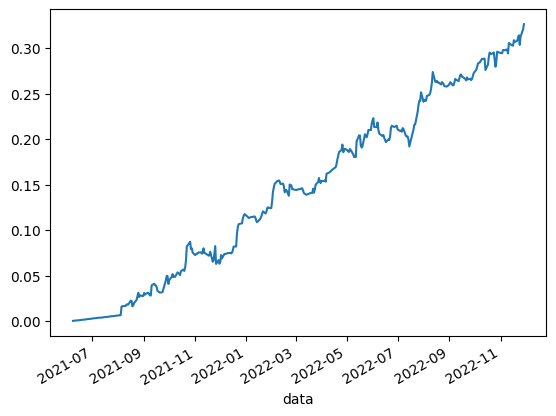

In [ ]:
df21_22['total'].cumsum().plot()


In [ ]:
pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 1.5 MB/s eta 0:00:00


In [ ]:
import quantstats as qs
qs.extend_pandas()

In [ ]:
df19_20

,JBSS3.SA,BEEF3.SA,BRFS3.SA,AGRO3.SA,VALE3.SA,PETR4.SA,KLBN11.SA,SLCE3.SA,total
data,,,,,,,,,
2019-06-06,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246
2019-06-07,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246
2019-06-10,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246
2019-06-11,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246
2019-06-12,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246,0.000246
...,...,...,...,...,...,...,...,...,...
2020-05-28,0.000113,0.012186,0.000113,0.000113,0.000113,0.000113,0.015275,0.038764,0.008349
2020-05-29,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,-0.003585,0.000113,-0.000349
2020-06-01,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.004098,-0.040174,-0.004424


[Performance Metrics]



                           Strategy
-------------------------  ----------
Start Period               2017-06-06
End Period                 2018-06-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          4.26%
CAGR﹪                     4.32%

Sharpe                     0.73
Prob. Sharpe Ratio         75.7%
Smart Sharpe               0.65
Sortino                    0.99
Smart Sortino              0.88
Sortino/√2                 0.7
Smart Sortino/√2           0.62
Omega                      1.18

Max Drawdown               -6.49%
Longest DD Days            88
Volatility (ann.)          6.05%
Calmar                     0.67
Skew                       -1.65
Kurtosis                   15.83

Expected Daily %           0.02%
Expected Monthly %         0.32%
Expected Yearly %          2.11%
Kelly Criterion            10.41%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.61%
Expected Shortfall (cVaR)  -0.61%

Max Consecutive Wins       36


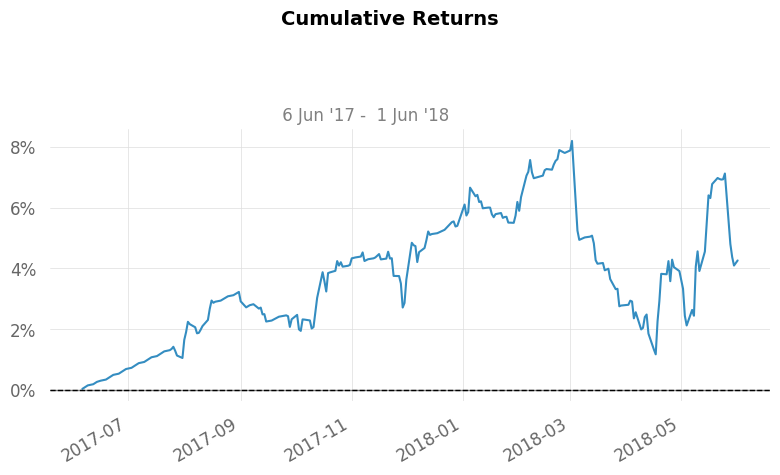

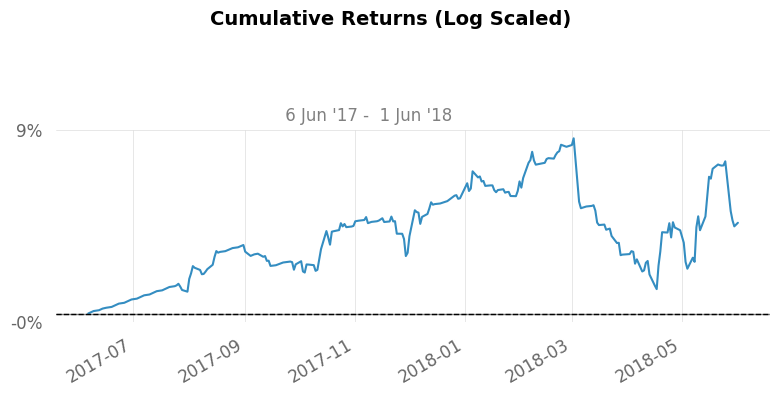

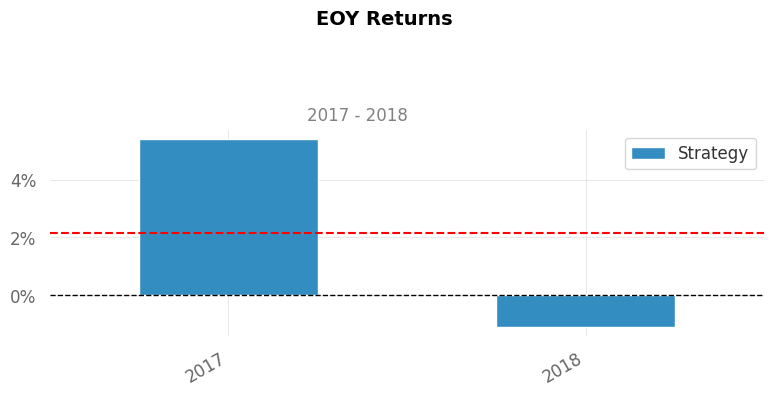

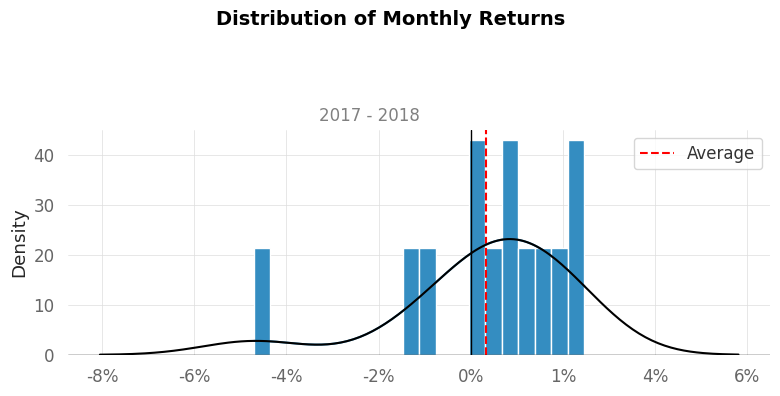

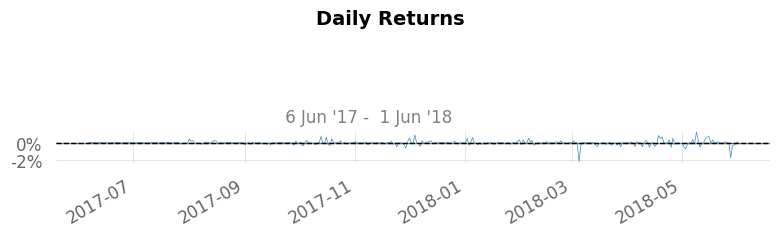

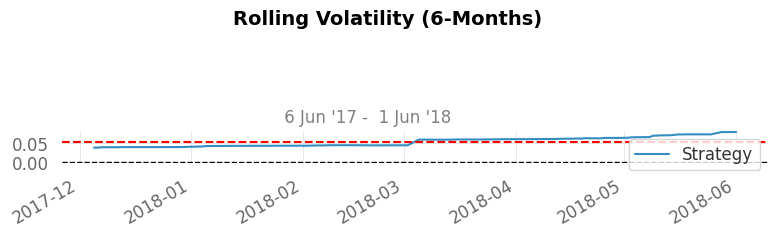

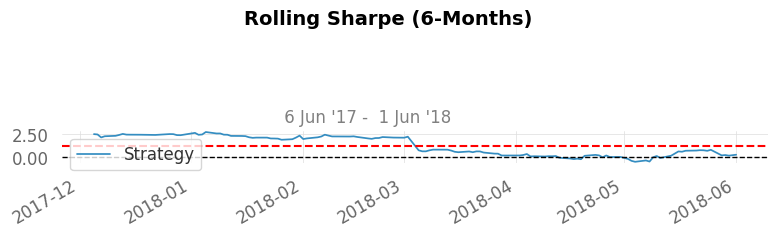

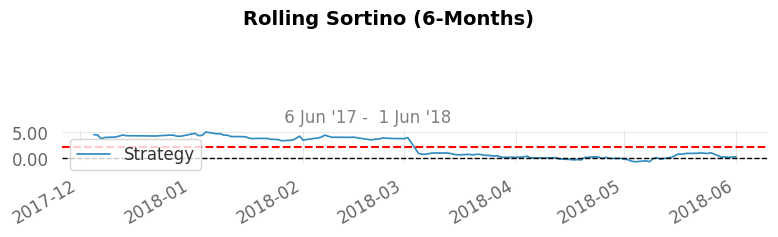

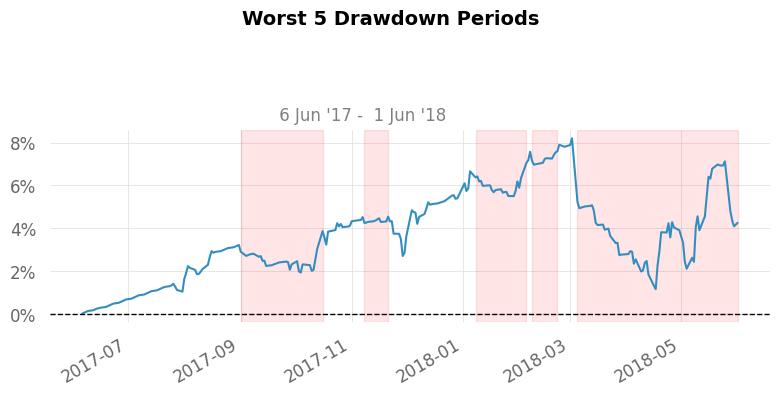

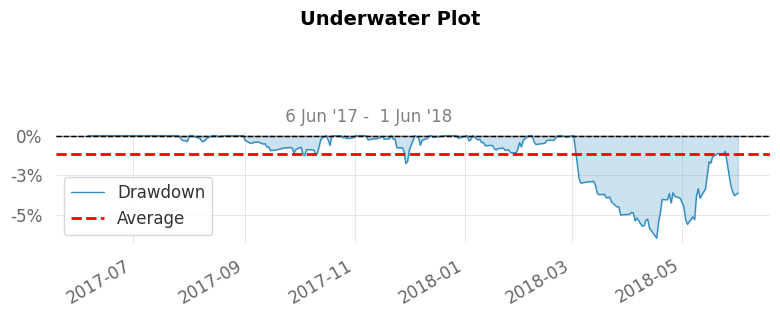

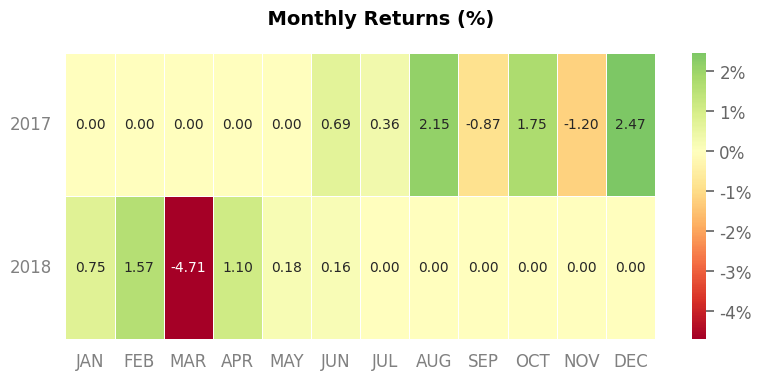

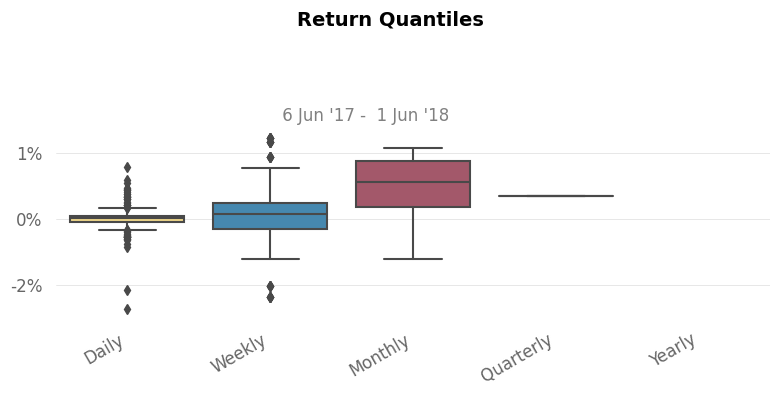

In [ ]:
qs.reports.full(df17_18['total'])

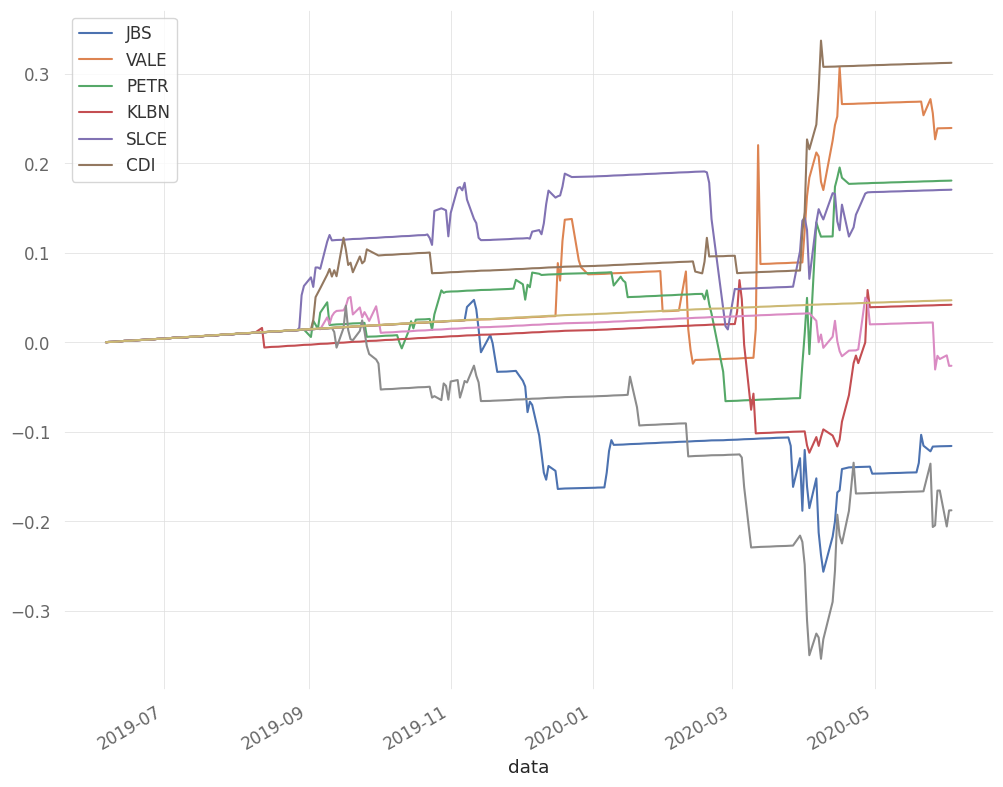

In [ ]:
plt.figure(figsize=(12,10))
for assets in ativos:
  plot = df19_20[assets]
  plot.cumsum().plot()
x = CDI.loc[CDI.index >= f'{df19_20.index[0]}']
x.loc[x.index <= f'{df19_20.index[-1]}']['valor'].cumsum().plot()
plt.legend(['JBS','VALE','PETR','KLBN','SLCE','CDI'])


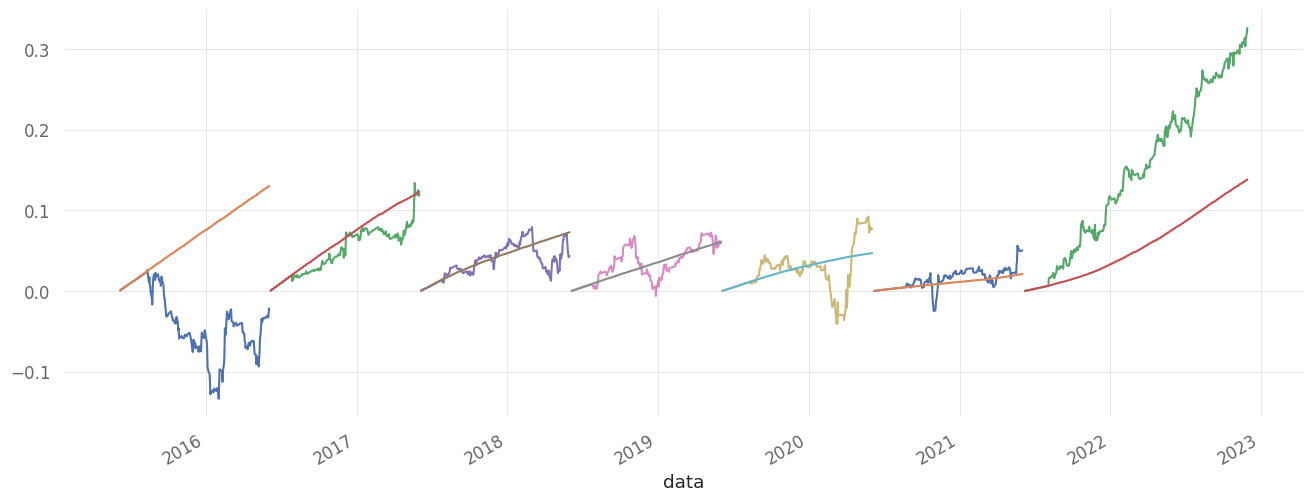

In [ ]:
anos  = [df15_16,df16_17,df17_18,df18_19,df19_20,df20_21,df21_22]

plt.figure(figsize=(16,6))
for ano in anos:
  ano['total'].cumsum().plot()
  x = CDI.loc[CDI.index >= f'{ano.index[0]}']
  x.loc[x.index <= f'{ano.index[-1]}']['valor'].cumsum().plot()
#plt.legend(['df13_15', 'df14_16','df15_17','df16_18','df17_19','df18_20','df19_21'])

**Código de retornos do mês**

<Axes: xlabel='data'>

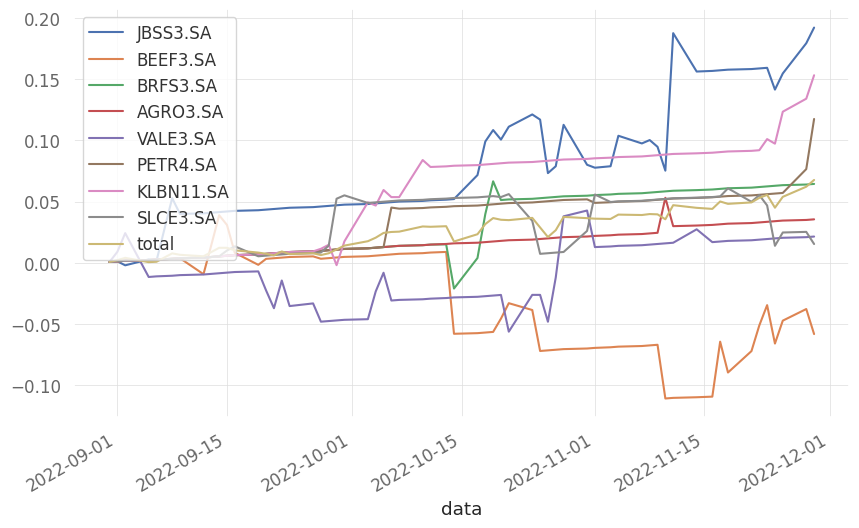

In [ ]:
initial_date = "2022-08-31"


frame = df21_22.loc[df21_22.index >= initial_date]
frame.cumsum().plot()


In [ ]:
import yfinance as yf
def catch_data(code, start_date, end_date):
    # get data on this ticker
    tickerData = yf.Ticker(code)

    # get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)
   
    return tickerDf

apoio= catch_data('^BVSP', "2022-08-30", "2022-09-30")['Close']
apoio = pd.DataFrame(apoio)
apoio.dropna()
apoio['return'] = apoio['Close'].pct_change()
apoio['cum_rets'] = (1 + apoio['return']).cumprod() - 1
apoio.dropna(inplace = True)

apoioSP= catch_data('^GSPC', "2022-08-30", "2022-09-30")['Close']
apoioSP = pd.DataFrame(apoioSP)
apoioSP.dropna()

apoioSP['return'] = apoioSP['Close'].pct_change()

apoioSP['cum_rets'] = (1 + apoioSP['return']).cumprod() - 1
#apoioSP.drop(['2022-02-28','2022-03-01'], axis=0, inplace=True)                  #ajuste excepcional de março
apoioSP.dropna(inplace = True)

In [ ]:
apoioSP.index = apoioSP.index.strftime("%Y-%m-%d")
apoioSP

,Close,return,cum_rets
Date,,,
2022-08-31,3955.000000,-0.007817,-0.007817
2022-09-01,3966.850098,0.002996,-0.004844
2022-09-02,3924.260010,-0.010737,-0.015529
2022-09-06,3908.189941,-0.004095,-0.019560
2022-09-07,3979.870117,0.018341,-0.001578
2022-09-08,4006.179932,0.006611,0.005022
2022-09-09,4067.360107,0.015271,0.020371
2022-09-12,4110.410156,0.010584,0.031170
2022-09-13,3932.689941,-0.043237,-0.013414


In [ ]:
apoio.index = apoio.index.strftime("%Y-%m-%d")
apoio

,Close,return,cum_rets
Date,,,
2022-08-31,109523.0,-0.008222,-0.008222
2022-09-01,110405.0,0.008053,-0.000235
2022-09-02,110864.0,0.004157,0.003921
2022-09-05,112203.0,0.012078,0.016046
2022-09-06,109764.0,-0.021737,-0.006040
2022-09-08,109916.0,0.001385,-0.004664
2022-09-09,112300.0,0.021689,0.016925
2022-09-12,113407.0,0.009858,0.026949
2022-09-13,110794.0,-0.023041,0.003287


In [ ]:
lista = []
dfs = [apoio,apoioSP,cdi,frame['total']]
for i in dfs:
  lista.append(4)

lista


fechamento = pd.DataFrame()

fechamento.set_index = apoio.index

fechamento['strategy'] = frame['total'].cumsum()
fechamento['ibovespa'] = apoio['return']
fechamento['S&P'] = apoioSP['return']
fechamento['CDI'] = CDI.loc[CDI.index>= initial_date]['valor']

In [ ]:
fechamento


,strategy,ibovespa,S&P,CDI
data,,,,
2022-08-31,0.000508,NaN,NaN,0.000508
2022-09-01,0.001990,NaN,NaN,0.000508
2022-09-02,0.003876,NaN,NaN,0.000508
2022-09-05,0.000371,NaN,NaN,0.000508
2022-09-06,0.000686,NaN,NaN,0.000508
...,...,...,...,...
2022-11-23,0.055435,NaN,NaN,0.000508
2022-11-24,0.044928,NaN,NaN,0.000508
2022-11-25,0.053809,NaN,NaN,0.000508


Método para pegar dados de várias ações em um único df.

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
tickers = ["ABEV3.SA","ITSA4.SA","JBSS3.SA","ITUB4.SA"]
d = web.get_data_yahoo(tickers,period = "5y")['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [ ]:
d

,ABEV3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA
Date,,,,
2018-04-02,20.014032,8.322325,28.356850,7.590450
2018-04-03,20.307737,8.279836,28.090219,7.348204
2018-04-04,20.299349,8.285901,28.273527,7.348204
2018-04-05,20.165079,8.261621,28.329069,7.210930
2018-04-06,19.510534,8.194849,28.467937,7.348204
...,...,...,...,...
2023-03-24,13.890000,7.850000,23.219999,18.110001
2023-03-27,13.930000,7.940000,23.620001,18.280001
2023-03-28,14.590000,7.910000,23.730000,17.910000
